In [3]:
from collections import Counter
import pandas as pd
from sklearn.model_selection import (train_test_split)
from sklearn.metrics import (
    mean_squared_error as MSE,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score
)
import numpy as np
import optuna
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import xgboost as xgb


data = pd.read_csv("data/employee_data.csv")

In [4]:
data.head(2)

,Age,Staying?,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.describe(exclude="number")

,Staying?,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Staying?                  1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

bagging reduces variance

boosting decreases bias

alpha: l2. bigger = underfit. when you have a lot of features

lambda: l1. bigger = underfit

## overfitting

1st. model complexity

* max_depth
* min_child_weight
* gamma (min_split_loss)

2nd. randomness, to make training robust to noise

* subsample
* colsample_bytree

## imbalance

overall performance

* scale_pos_weight
* use auc for evaluation

correct probability

* when you can't rebalance
* max_delta_step to finite number

In [8]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
# study = optuna.create_study(
#     # storage="sqlite:///employee_data.db",
#     direction="maximize",
#     study_name="employee_data",
#     load_if_exists=True,
#     pruner=optuna.pruners.HyperbandPruner(),
#     sampler=optuna.samplers.TPESampler(),
# )
study_max = optuna.create_study(
    # storage="sqlite:///employee_data.db",
    direction="maximize",
    study_name="employee_data",
    load_if_exists=True,
    pruner=optuna.pruners.MedianPruner(),
    sampler=optuna.samplers.RandomSampler(),
)

study_min = optuna.create_study(
    # storage="sqlite:///employee_data.db",
    direction="minimize",
    study_name="employee_data",
    load_if_exists=True,
    pruner=optuna.pruners.MedianPruner(),
    sampler=optuna.samplers.RandomSampler(),
)

In [9]:


def objective_auc(trial):
    data = pd.read_csv("data/employee_data.csv")

    X, y = data.drop(["Staying?", "EmployeeNumber", "EmployeeCount", "StandardHours", "HourlyRate", "MonthlyIncome", "MonthlyRate"], axis=1), data["Staying?"]

    categorical_cols = X.select_dtypes(include="object").columns.tolist()

    # same as factors in R
    for col in categorical_cols:
        X[col] = X[col].astype("category")


    y.replace("Yes", 1, inplace=True)
    y.replace("No", 0, inplace=True)
    y.astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

    d_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
    d_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

    test_metric = "auc"
    
    param = {
        "objective": "binary:logistic",
        "tree_method": "hist",
        "eval_metric": f"{test_metric}",
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1e-8, 10.0),
        # "max_delta_step": trial.suggest_int("max_delta_step", 1, 10),
        "booster": trial.suggest_categorical("booster", ["gbtree","dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 10.0),
        "alpha": trial.suggest_float("alpha", 1e-8, 10.0),
        "subsample": trial.suggest_float("subsample", 0.1, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 1e-8, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 1e-8, 1.0), #CRASHES WITH GPU_HIST
        "colsample_bynode": trial.suggest_float("colsample_bynode", 1e-8, 1.0), #CRASHES WITH GPU_HIST
        "sampling_method": "uniform",  # uniform, gradient_based
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "max_bin": trial.suggest_int("max_bin", 10, 1000),
        "num_parallel_tree": trial.suggest_int("num_parallel_tree", 1, 100),
        "num_boost_round": trial.suggest_int("num_boost_round", 100, 1000),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 3, 8)
        param["eta"] = trial.suggest_float("eta", 1e-8, 2)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 100.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise","lossguide"])
        if param["grow_policy"] == "lossguide":
            param["max_leaves"] = trial.suggest_int("max_leaves", 1, 20)

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform","weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree","forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0)
        param["one_drop"] = trial.suggest_categorical("one_drop", [True,False])
        
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, f"test-{test_metric}")
    clf = xgb.train(param, 
                    d_train, 
                    evals=[(d_test, "test")], 
                    callbacks=[pruning_callback],
                    early_stopping_rounds=10,
                    verbose_eval=0
                )
    y_pred = clf.predict(d_test)
    labels = np.rint(y_pred)
    auc = roc_auc_score(y_test, labels)
    acc = accuracy_score(y_test, labels)
    
    return auc


study_max.optimize(objective_auc, n_trials=1000, n_jobs=-1)

In [10]:
study_max.best_value

0.8106568364611261

In [11]:
study_max.best_trial

FrozenTrial(number=550, state=1, values=[0.8106568364611261], datetime_start=datetime.datetime(2023, 5, 29, 23, 26, 47, 663486), datetime_complete=datetime.datetime(2023, 5, 29, 23, 26, 49, 859942), params={'scale_pos_weight': 4.35990649757306, 'booster': 'dart', 'lambda': 1.2024475199373714, 'alpha': 5.120988128689648, 'subsample': 0.9920986223684604, 'colsample_bytree': 0.46771388214902837, 'colsample_bylevel': 0.21828521572361279, 'colsample_bynode': 0.2347427433251597, 'min_child_weight': 3, 'max_bin': 778, 'num_parallel_tree': 86, 'num_boost_round': 699, 'max_depth': 3, 'eta': 1.919342616121968, 'gamma': 0.4784987632103332, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.5825632256548552, 'skip_drop': 0.9013912160619871, 'one_drop': False}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.8426510014193345, 1: 0.8559769752404983, 2: 0.8515612679388109, 3: 0.8589339220943069, 4: 0.8580665510171898, 5: 0.8633102034379435, 6: 0

In [12]:
final_params = study_max.best_trial.params
final_params["tree_method"] = "hist"

In [13]:
final_params

{'scale_pos_weight': 4.35990649757306,
 'booster': 'dart',
 'lambda': 1.2024475199373714,
 'alpha': 5.120988128689648,
 'subsample': 0.9920986223684604,
 'colsample_bytree': 0.46771388214902837,
 'colsample_bylevel': 0.21828521572361279,
 'colsample_bynode': 0.2347427433251597,
 'min_child_weight': 3,
 'max_bin': 778,
 'num_parallel_tree': 86,
 'num_boost_round': 699,
 'max_depth': 3,
 'eta': 1.919342616121968,
 'gamma': 0.4784987632103332,
 'grow_policy': 'depthwise',
 'sample_type': 'uniform',
 'normalize_type': 'forest',
 'rate_drop': 0.5825632256548552,
 'skip_drop': 0.9013912160619871,
 'one_drop': False,
 'tree_method': 'hist'}

In [14]:
X2, y2 = data.drop(["Staying?", "EmployeeNumber", "EmployeeCount", "StandardHours", "HourlyRate", "MonthlyIncome", "MonthlyRate"], axis=1), data["Staying?"]

# categorical_cols = X.select_dtypes(include="object").columns.tolist()

# same as factors in R
# for col in categorical_cols:
#     X[col] = X[col].astype("category")
for f in X2.columns:
    if X2[f].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(X2[f].values))
        X2[f] = lbl.transform(list(X2[f].values))

y2.replace("Yes", 1, inplace=True)
y2.replace("No", 0, inplace=True)
y2.astype(int)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=.3)

print(Counter(y2))
print(Counter(y2)[1] / Counter(y2)[0])

Counter({0: 1233, 1: 237})
0.1922141119221411


[23:27:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round" } are not used.

[0]	test-rmse:0.40593
[9]	test-rmse:0.36221
auc: 0.812180066245107
mse: 0.08533277717087154
rmse: 0.29211774538851887
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       369
           1       0.51      0.61      0.55        72

    accuracy                           0.84       441
   macro avg       0.71      0.75      0.73       441
weighted avg       0.85      0.84      0.84       441



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

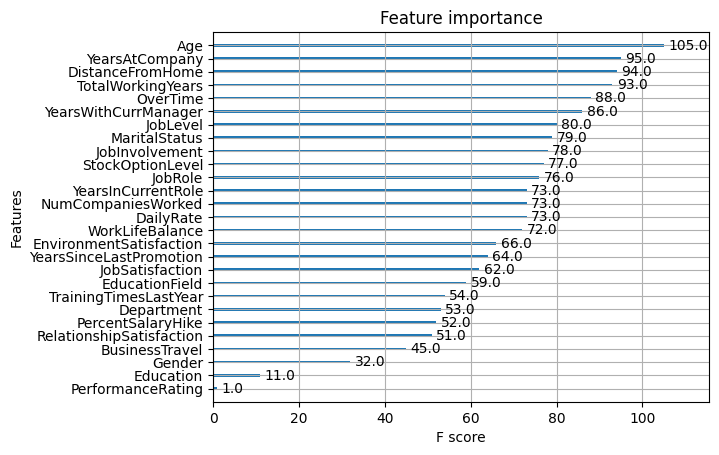

In [15]:
d_train = xgb.DMatrix(X_train2, y_train2, enable_categorical=True)
d_test = xgb.DMatrix(X_test2, y_test2, enable_categorical=True)
# final_params = {"eval_metric": "error"}

clf = xgb.train(final_params, d_train, evals=[(d_test, "test")], early_stopping_rounds=10, verbose_eval=10)
y_pred = clf.predict(d_test)
labels = np.rint(y_pred)
print("auc:", roc_auc_score(y_test2, y_pred))
print("mse:", MSE(y_test2, y_pred) ** 2)
print("rmse:", MSE(y_test2, y_pred))
print(classification_report(y_test2, y_pred.round(), zero_division=0))
xgb.plot_importance(clf)


In [16]:
clf

In [17]:
clf.best_iteration

7

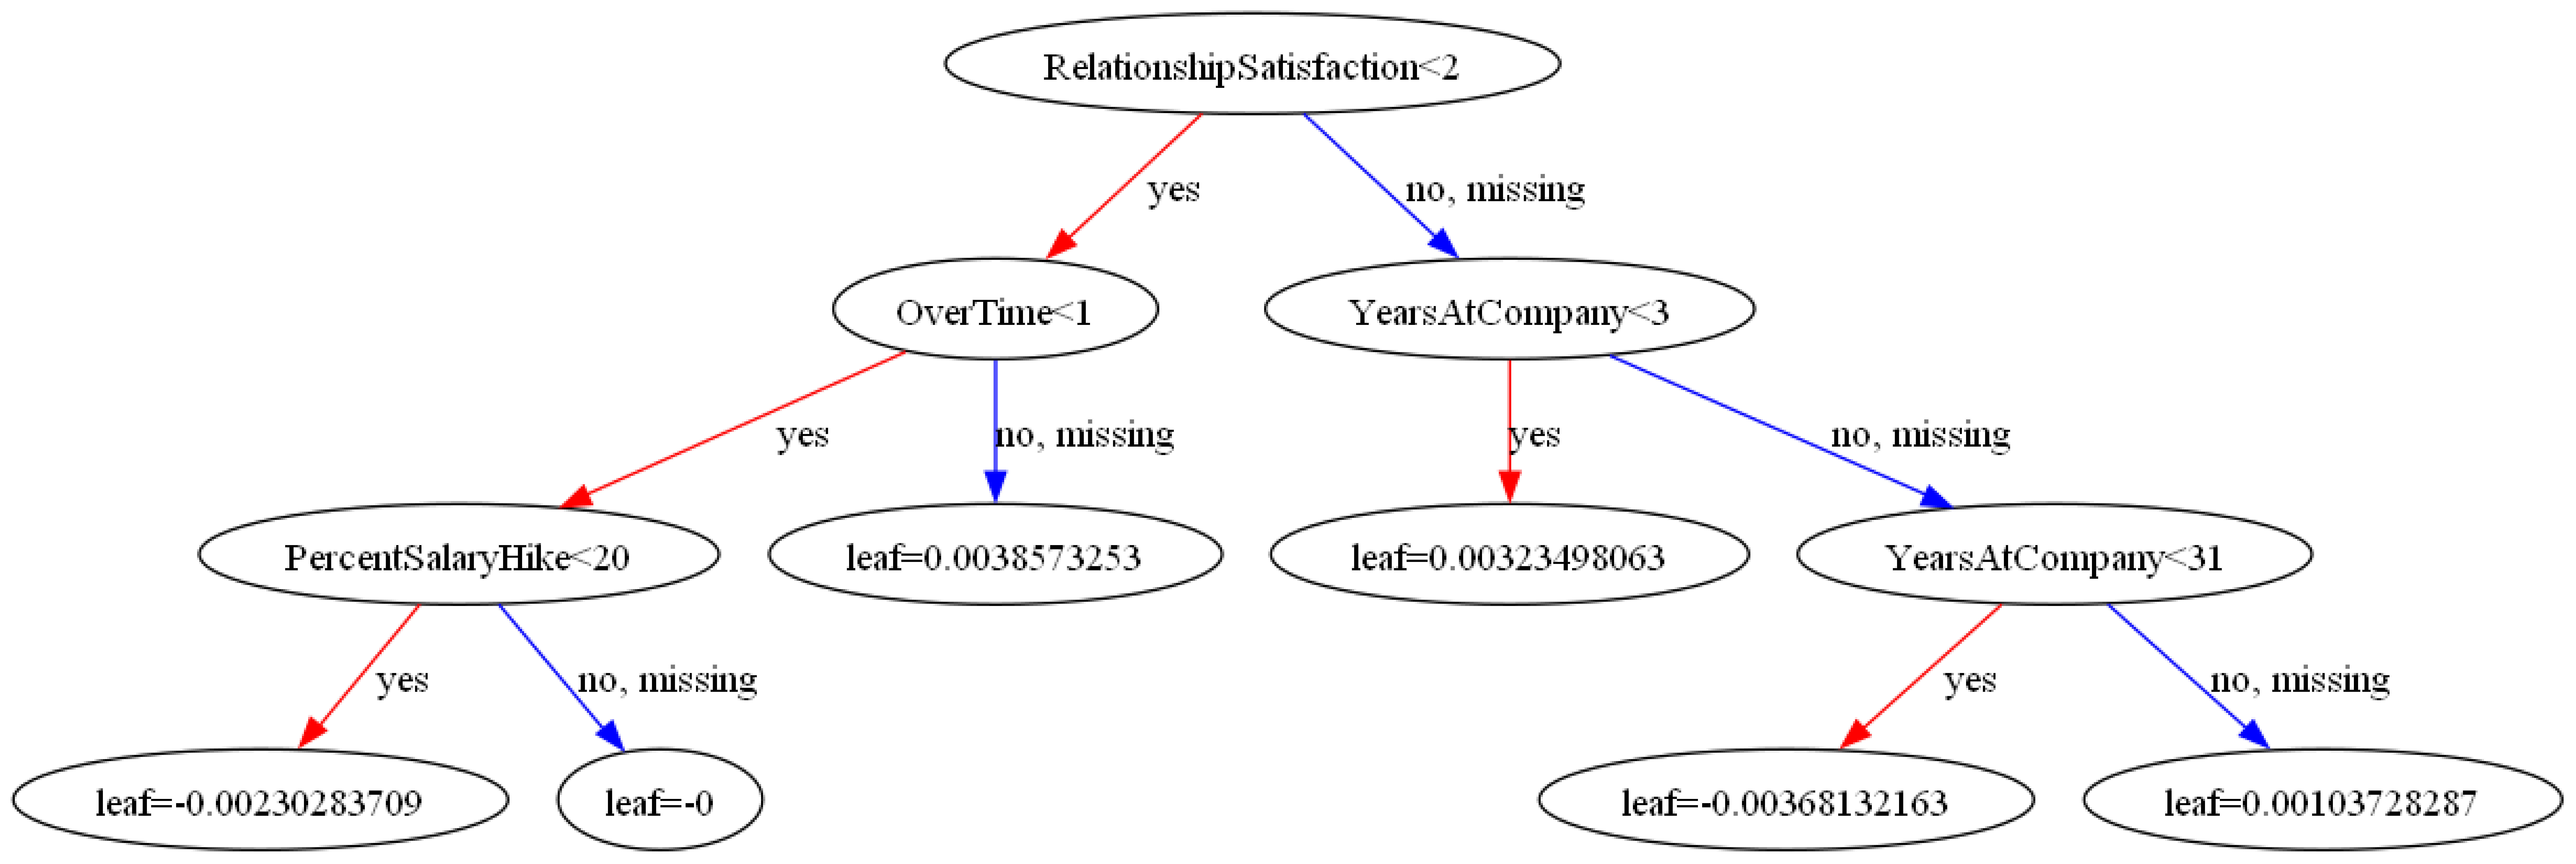

In [18]:
xgb.plot_tree(clf)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

In [19]:
optuna.visualization.plot_optimization_history(study_max)

In [20]:
optuna.visualization.plot_parallel_coordinate(study_max)

In [21]:
optuna.visualization.plot_slice(study_max)

In [22]:
optuna.visualization.plot_param_importances(study_max)